# Q1

In [10]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Q1-1

In [11]:
img1_1 = cv2.imread('data\\1.1.jpg', cv2.IMREAD_GRAYSCALE)

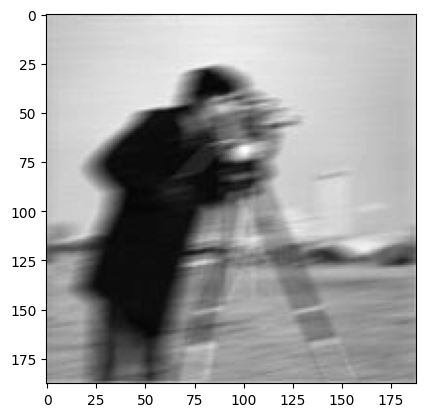

In [12]:
plt.imshow(img1_1, cmap='gray')

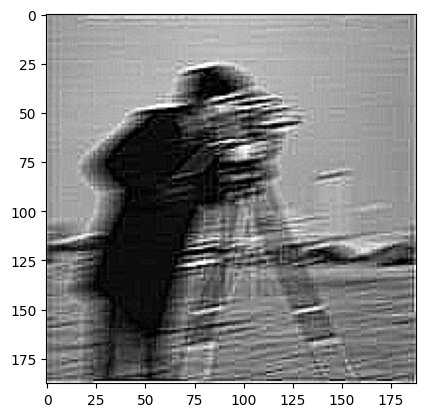

In [13]:
kernel = np.array([[-1, -1, -1],
                   [-1,  9, -1],
                   [-1, -1, -1]])
sharpened_image_highpass = cv2.filter2D(img1_1, -1, kernel)
plt.imshow(sharpened_image_highpass, cmap='gray')


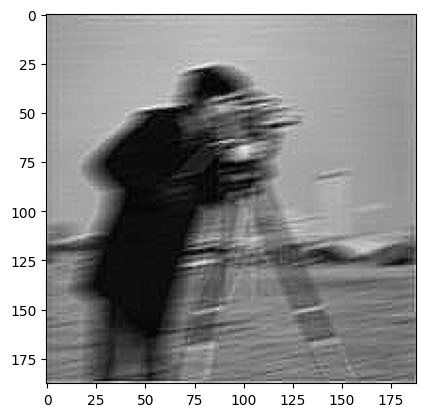

In [14]:
laplacian = cv2.Laplacian(img1_1, cv2.CV_64F)
sharpened_image_laplacian = cv2.convertScaleAbs(img1_1 - laplacian)
plt.imshow(sharpened_image_laplacian,cmap='gray')

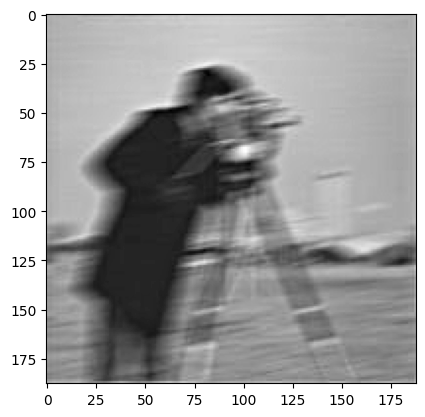

In [15]:
blurred_image = cv2.GaussianBlur(img1_1, (0, 0), 3)
sharpened_image_unsharp = cv2.addWeighted(img1_1, 2, blurred_image, -1, 0)
plt.imshow(img1_1 - 0.4 * blurred_image,cmap='gray')

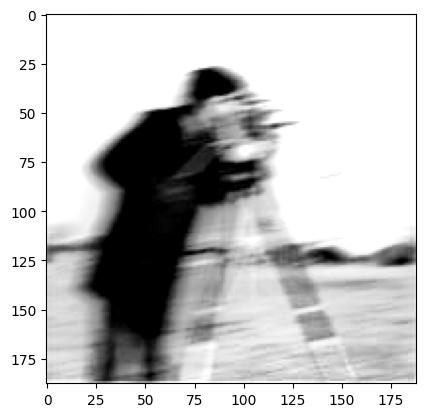

In [16]:
f_img = np.fft.fft2(img1_1)
kernel_size=(5, 5)
# Shift the zero frequency component to the center
f_img_shift = np.fft.fftshift(f_img)
sigma=1.5
alpha=1.8
# Create a filter for sharpening
rows, cols = img1_1.shape
# Create a Gaussian low-pass filter
crow, ccol = rows // 2, cols // 2
x = np.arange(-crow, crow)
y = np.arange(-ccol, ccol)
xx, yy = np.meshgrid(x, y)
low_pass_filter = np.exp(-((xx ** 2) + (yy ** 2)) / (2 * sigma ** 2))

# Create a high-pass filter (subtract low-pass filter from 1)
high_pass_filter = 1 - low_pass_filter

# Apply the high-pass filter to the frequency domain
f_img_shift_filtered = f_img_shift * high_pass_filter

# Inverse Fourier transform
f_img_back = np.fft.ifftshift(f_img_shift_filtered)
img_back = np.fft.ifft2(f_img_back)
img_back = np.abs(img_back)

# Scale the sharpened image
sharpened_img = alpha * img1_1 - (alpha - 1) * img_back

# Clip values to ensure they are within 0-255 range
sharpened_img = np.clip(sharpened_img, 0, 255)

# Convert the result to uint8
sharpened_img = np.uint8(sharpened_img)

    

plt.imshow(sharpened_img, cmap='gray')



## Q1-2

In [26]:
img1_2 = cv2.imread('data\\1.2.jpg')

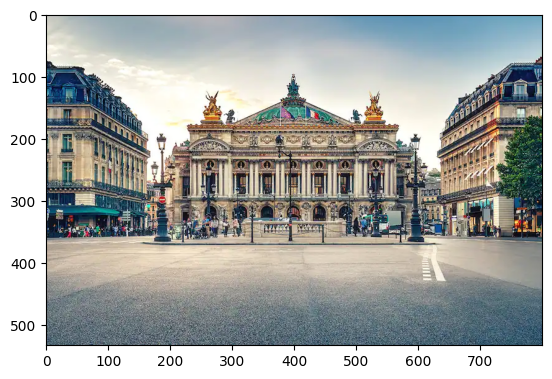

In [27]:
plt.imshow(cv2.cvtColor(img1_2, cv2.COLOR_BGR2RGB))

In [73]:
gray_image = cv2.cvtColor(img1_2, cv2.COLOR_RGB2GRAY)

edges = cv2.Canny(gray_image, 450, 500)

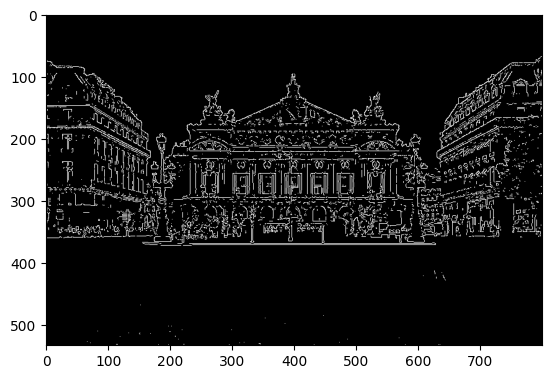

In [74]:
plt.imshow(edges, cmap='gray')

In [25]:
img1_3 = cv2.imread('data\\1.3.jpg')

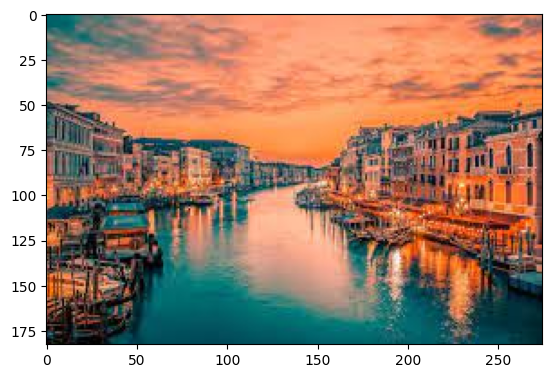

In [23]:
plt.imshow(cv2.cvtColor(img1_3, cv2.COLOR_BGR2RGB))

In [75]:
gray_image = cv2.cvtColor(img1_3, cv2.COLOR_RGB2GRAY)

edges = cv2.Canny(gray_image, 200, 250)

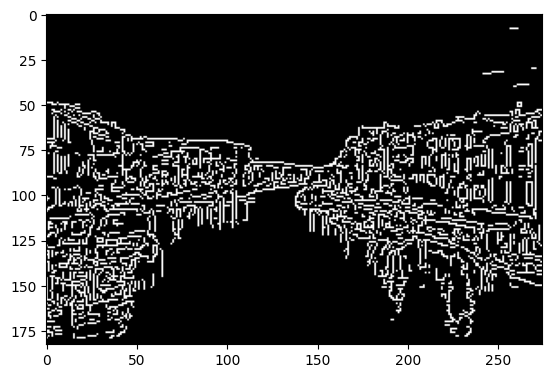

In [76]:
plt.imshow(edges, cmap='gray')

## Q1-3

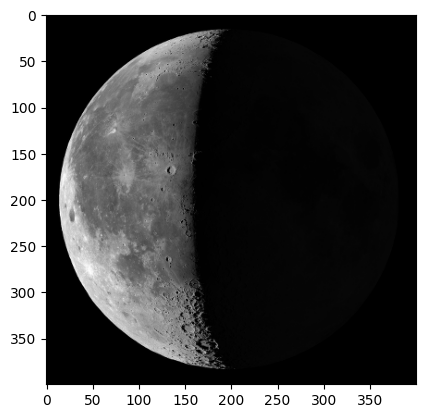

In [44]:
img1_4 = cv2.imread('data\\1.4.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img1_4, cmap='gray')

In [45]:
sharpening_kernel = np.array([
    [-1, -1, -1],
    [-1,  9, -1],
    [-1, -1, -1]
])

sharpened_image = cv2.filter2D(img1_4, -1, sharpening_kernel)


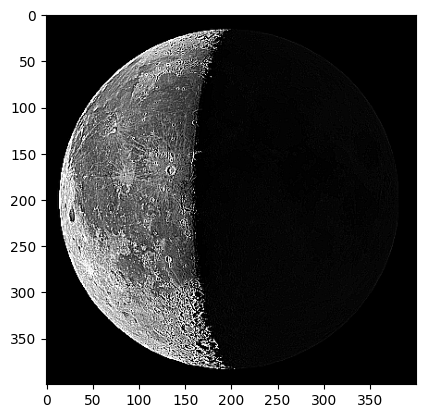

In [46]:
plt.imshow(sharpened_image, cmap='gray')

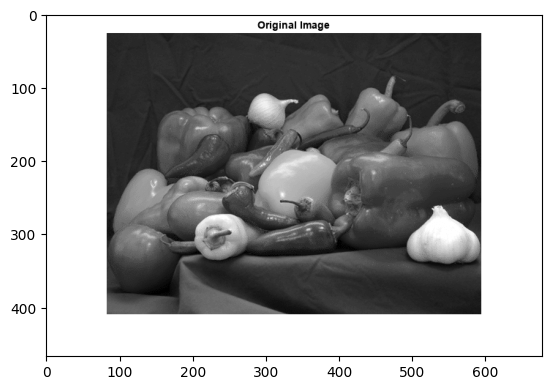

In [48]:
img1_5 = cv2.imread('data\\1.5.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img1_5, cmap='gray')

In [51]:
sharpening_kernel = np.array([
    [-1, -1, -1],
    [-1,  9, -1],
    [-1, -1, -1]
])

sharpened_image = cv2.filter2D(img1_5, -1, sharpening_kernel)


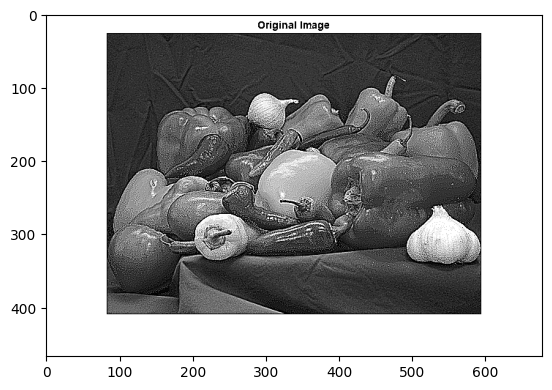

In [52]:
plt.imshow(sharpened_image, cmap='gray')

## Q1-4

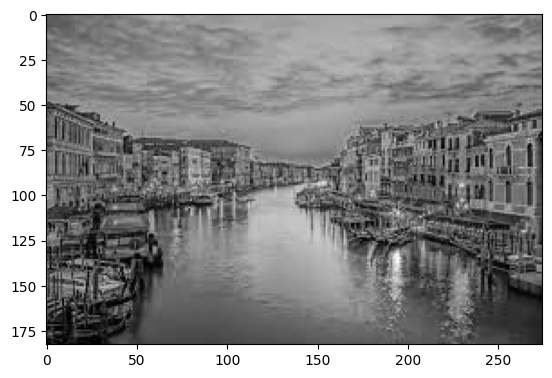

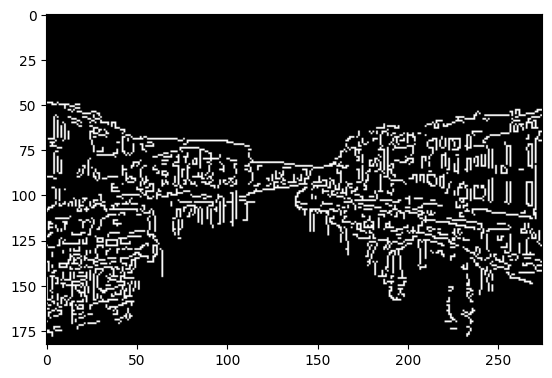

In [79]:
gray_image = cv2.cvtColor(img1_3, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.show()
edges = cv2.Canny(gray_image, gray_image.mean() * 2, gray_image.mean() * 3)
plt.imshow(edges, cmap='gray')

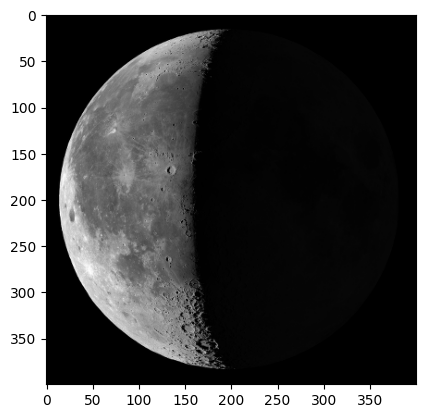

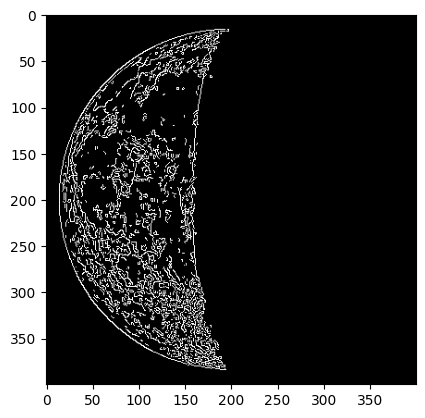

In [81]:
# gray_image = cv2.cvtColor(img1_4, cv2.COLOR_RGB2GRAY)
plt.imshow(img1_4, cmap='gray')
plt.show()
edges = cv2.Canny(img1_4, img1_4.mean() * 2, img1_4.mean() * 3)
plt.imshow(edges, cmap='gray')

# Q3

In [129]:
def draw_bboxes(image, bbox, color):
    if isinstance(bbox, tuple):
        cv2.rectangle(image, (bbox[0], bbox[1]), (bbox[2], bbox[3]), color, 2)
    else:
        image = cv2.polylines(image, [np.int32(bbox)], True, color, 3, cv2.LINE_AA)

    return image

In [138]:
original_image = cv2.imread('data\\3.0.png', 0)
cropped_images = [cv2.imread(f'data\\3.{i}.png', 0) for i in range(1, 9)]

In [131]:
from skimage.feature import hog
from skimage import exposure

def compute_hog(image):
    hog_features, hog_image = hog(image, visualize=True)
    hog_image = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    hog_image = (hog_image * 255).astype(np.uint8)
    return hog_features, hog_image

def find_best_match(original_hog_image, cropped_hog_image):
    result = cv2.matchTemplate(original_hog_image, cropped_hog_image, cv2.TM_CCOEFF_NORMED)
    _, max_val, _, max_loc = cv2.minMaxLoc(result)
    return max_loc, max_val

def HOG(original_image, cropped_image):
    original_hog_features, original_hog_image = compute_hog(original_image)
    cropped_hog_features, cropped_hog_image = compute_hog(cropped_image)
    
    max_loc, max_val = find_best_match(original_hog_image, cropped_hog_image)
    
    return max_loc, max_val


In [132]:
idxs = []
hog_bboxes = []
for i, cropped_image in enumerate(cropped_images):
    loc, val = HOG(original_image, cropped_image)
    if val > 0.7:
        idxs.append(i + 1)
        h, w = cropped_image.shape[:2] 
        hog_bboxes.append((loc[0], loc[1], loc[0] + w, loc[1] + h))

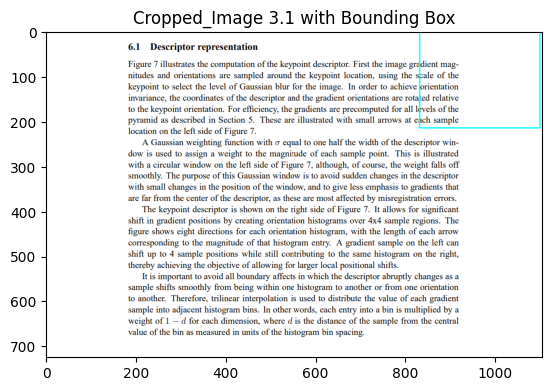

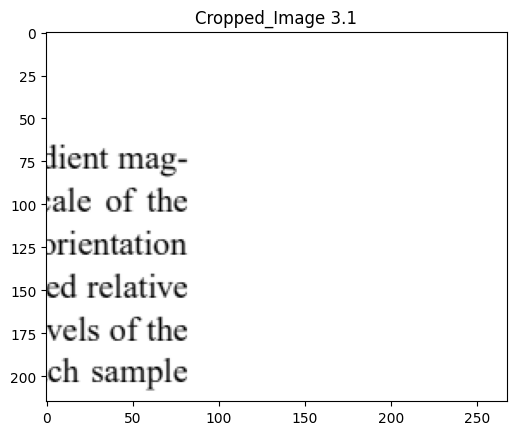

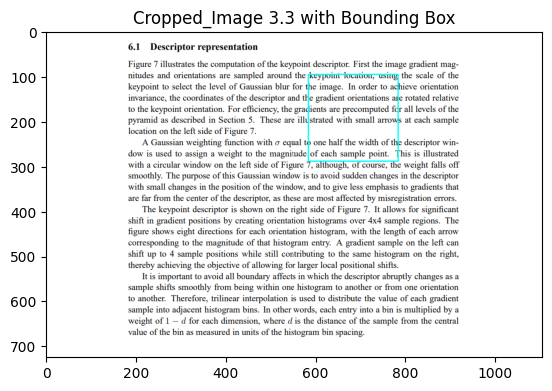

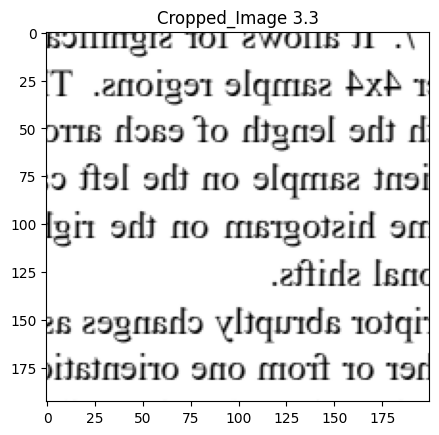

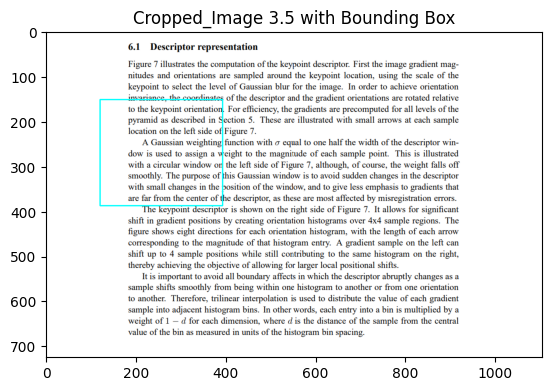

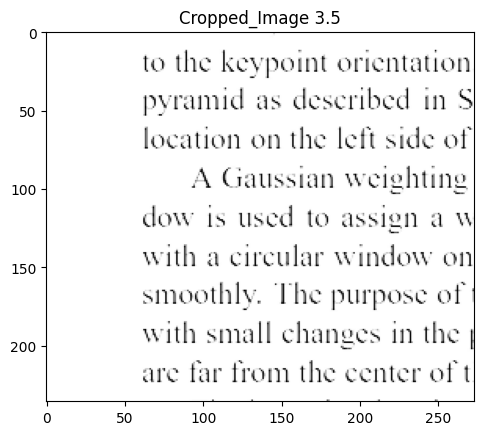

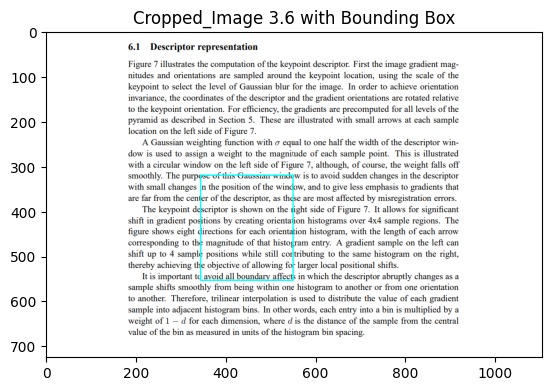

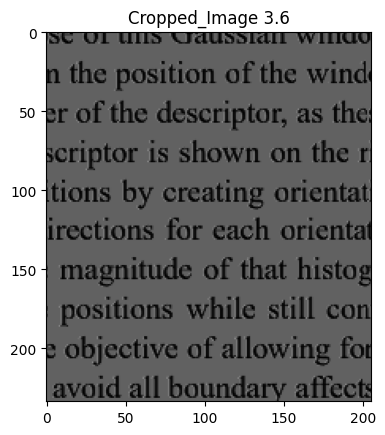

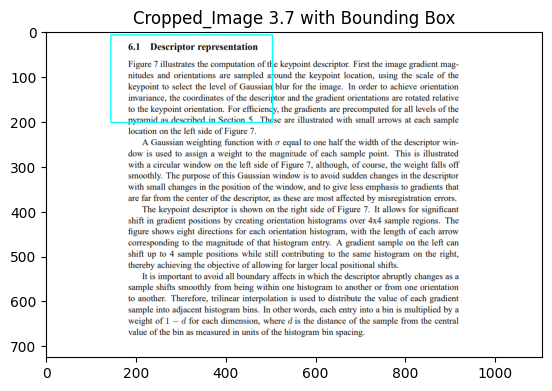

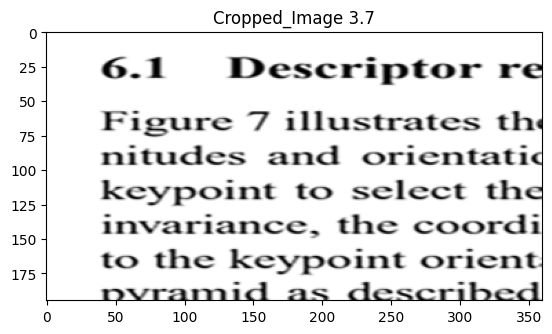

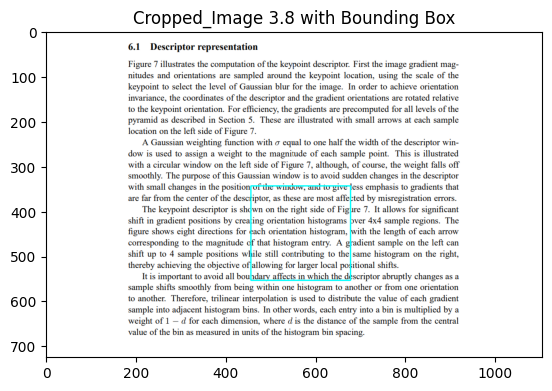

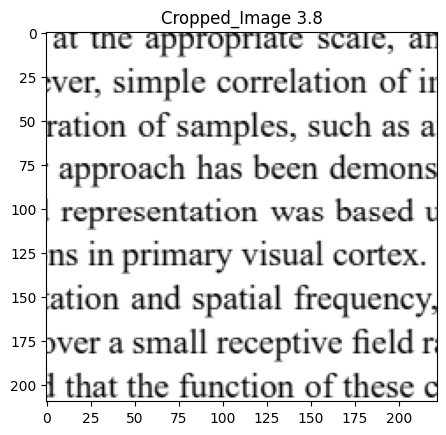

In [134]:
for idx, hog_bbox in zip(idxs, hog_bboxes):
    original_image_hog = cv2.imread('data\\3.0.png')
    original_image_hog = draw_bboxes(original_image_hog, hog_bbox, (255, 255, 0))
    plt.imshow(cv2.cvtColor(original_image_hog, cv2.COLOR_BGR2RGB))
    plt.title(f'Cropped_Image 3.{idx} with Bounding Box')
    plt.show()

    plt.imshow(cv2.cvtColor(cropped_images[idx - 1], cv2.COLOR_BGR2RGB))
    plt.title(f'Cropped_Image 3.{idx}')
    plt.show()

    print('\n\n')


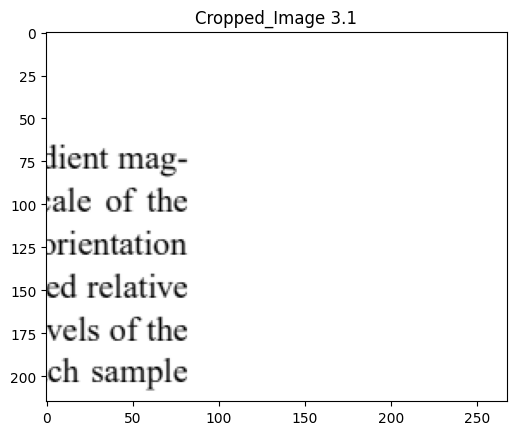

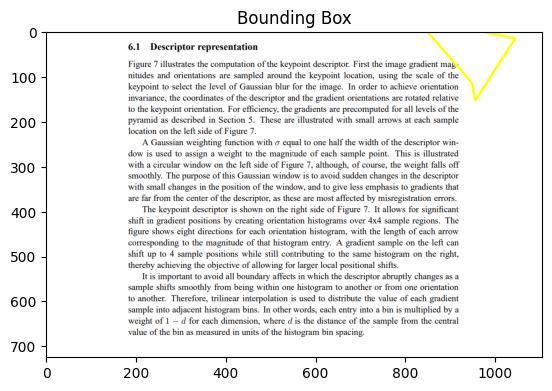

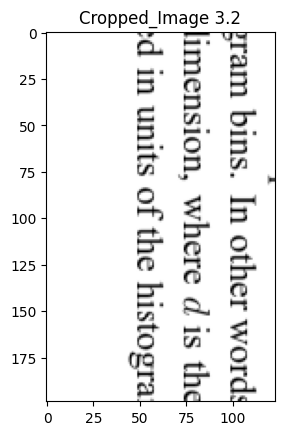

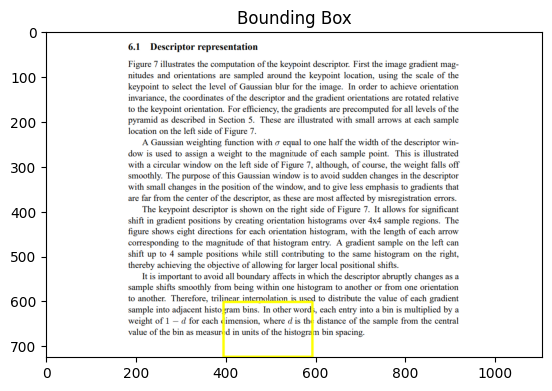

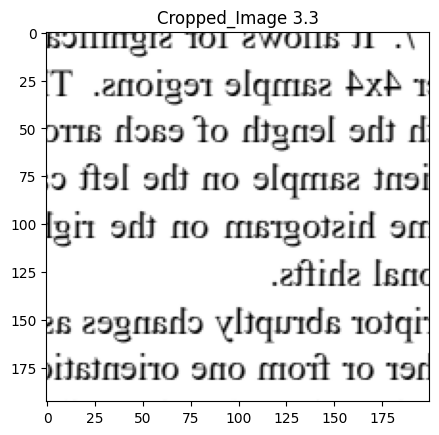

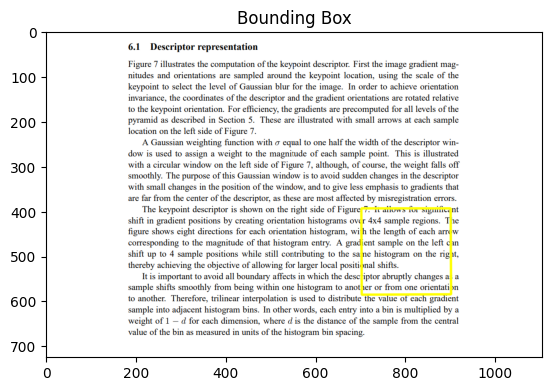

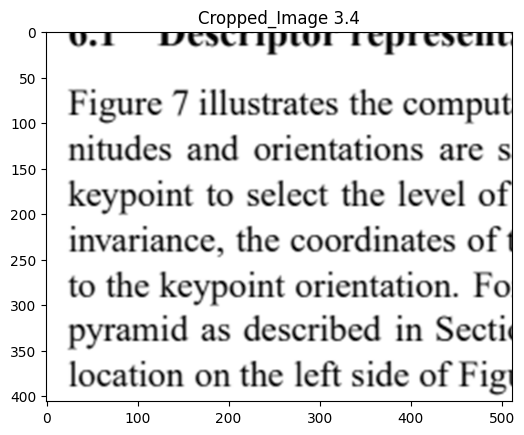

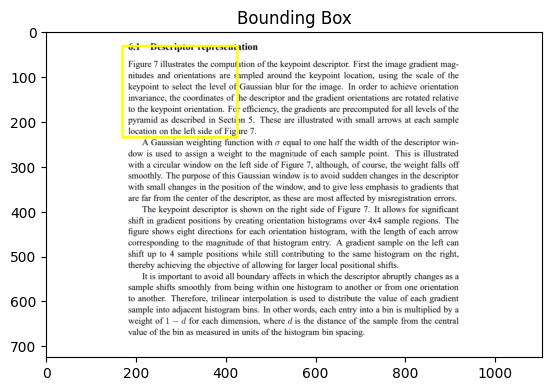

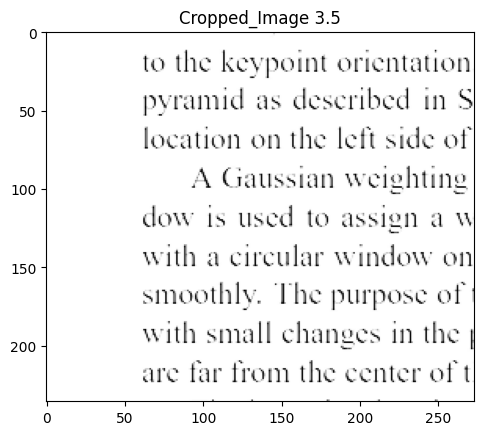

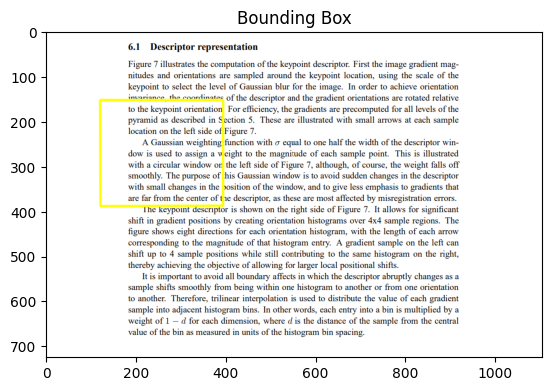

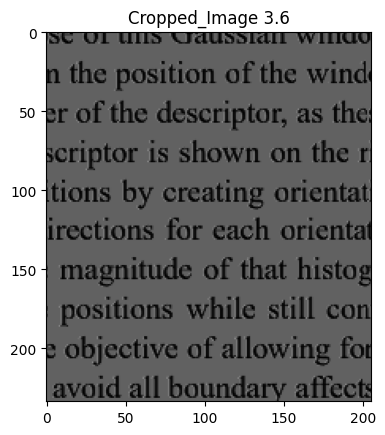

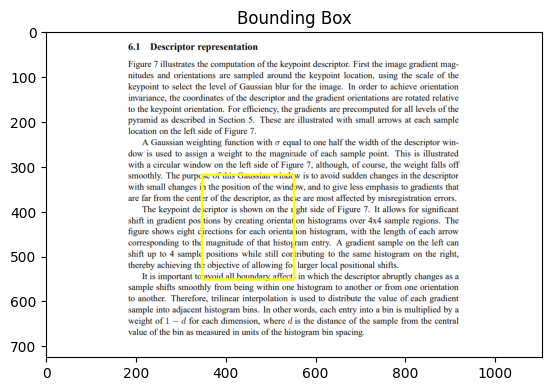

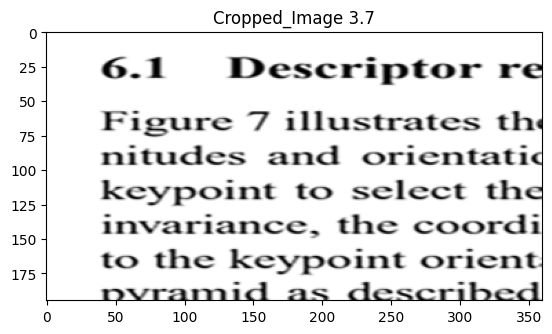

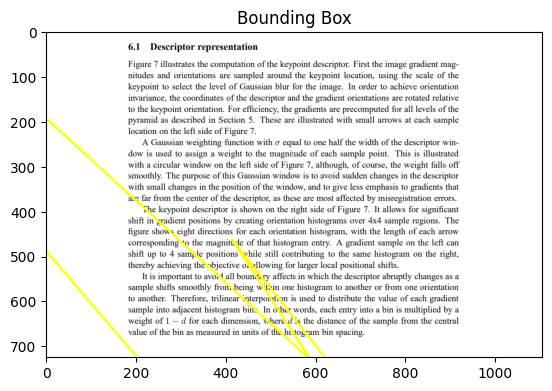

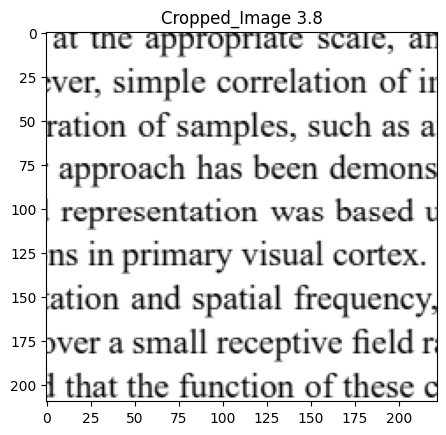

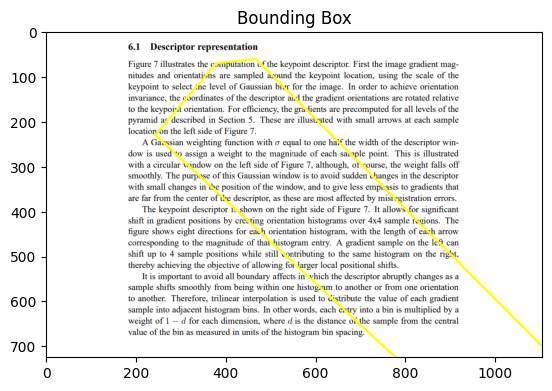

In [151]:
def detect_keypoints_and_descriptors(image):
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)
    return keypoints, np.float32(descriptors) if descriptors is not None else None

def match_keypoint_descriptors(descriptors1, descriptors2):
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(descriptors1, descriptors2, k=2)

    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)
    return good_matches

def find_homography_and_bbox(keypoints1, keypoints2, good_matches, cropped_image_shape):
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    homography_matrix, mask = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC, 5.0)
    cropped_image_height, cropped_image_width = cropped_image_shape[:2]
    points = np.float32([[0, 0], [0, cropped_image_height - 1], [cropped_image_width - 1, cropped_image_height - 1], [cropped_image_width - 1, 0]]).reshape(-1, 1, 2)
    transformed_points = cv2.perspectiveTransform(points, homography_matrix)

    return transformed_points

def SIFT(original_image, cropped_image):
    cropped_image_transformations = [cropped_image, cv2.flip(cropped_image, 1)]

    keypoints_original, descriptors_original = detect_keypoints_and_descriptors(original_image)

    best_match = None
    max_good_matches = 0
    best_transformed_points = None

    for transformed_image in cropped_image_transformations:
        keypoints_transformed, descriptors_transformed = detect_keypoints_and_descriptors(transformed_image)
        if descriptors_transformed is None:
            continue
        good_matches = match_keypoint_descriptors(descriptors_original, descriptors_transformed)
        if len(good_matches) > max_good_matches:
            max_good_matches = len(good_matches)
            best_match = good_matches
            best_transformed_points = find_homography_and_bbox(keypoints_original, keypoints_transformed, good_matches, cropped_image.shape)

    if best_transformed_points is not None and len(best_match) > 10:
        return best_transformed_points, best_match
    else:
        return None, best_match

idxs = []
sift_bboxes = []
for i, cropped_image in enumerate(cropped_images):
    dst, matches = SIFT(original_image, cropped_image)
    if dst is not None:
        idxs.append(i + 1)
        sift_bboxes.append(dst)
for idx, sift_bbox in zip(idxs, sift_bboxes):
    original_image_hog = cv2.imread('data\\3.0.png')
    original_image_hog = draw_bboxes(original_image_hog, sift_bbox, (0, 255, 255))
    plt.imshow(cv2.cvtColor(cropped_images[idx - 1], cv2.COLOR_BGR2RGB))
    plt.title(f'Cropped_Image 3.{idx}')
    plt.show()
    plt.imshow(cv2.cvtColor(original_image_hog, cv2.COLOR_BGR2RGB))
    plt.title('Bounding Box')
    plt.show()
    print('\n\n')

SIFT and HOG are both powerful techniques used in computer vision, but they have some differences which are.

1. **Orientation Resilience**:
   - SIFT: SIFT stands out because it's robust against changes in image orientation. This means it can identify objects even if they're rotated or resized.
   - HOG: HOG doesn't handle orientation changes as effectively as SIFT. It might struggle to recognize objects if they're rotated or resized differently from the training data.

2. **Adaptability to Illumination and Perspective**:
   - SIFT: SIFT is also known for its ability to handle various lighting conditions and different perspectives well. It can still recognize objects accurately even if the lighting or viewpoint changes.
   - HOG: While HOG is decent at recognizing objects under different lighting conditions, it might have trouble with extreme changes in perspective.